# NYC Refuse Analysis for the Years 1992-2018

<p> We obtained refuse data for the five New York City boroughs for the years 1992-2019 from the <a href=https://opendata.cityofnewyork.us/> New York City</a> open data website. We also obtained census population data and interpolated yearly intercensal population estimates for each NYC borough. Using this data, we were able to determine yearly per capita refuse output in NYC. 

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

In [3]:
# Import population data from population estimates file
input_1 = os.path.join("..","Population_Estimate_Analysis","CD_population_estimates.csv")
population_df = pd.read_csv(input_1,index_col="CD_ID")
population_df = population_df.drop(["1990", "1991"],axis=1)

# Import trash data from clean tonnage data file
input_2 = os.path.join("..","Clean_Data","TonnageClean.csv")
trash_df = pd.read_csv(input_2,index_col=0)

In [4]:
# Drop recycling information as we are only interested in looking at total refuse
trash_df=trash_df[trash_df["Year"]<2019].drop(["MGP","Paper"],axis=1)

In [5]:
# Sum population of whole city in each year
population_df = population_df.reset_index()
population_df = population_df.drop(["CD_ID", "Borough", "CD Number"],axis=1)
population_total_df = pd.DataFrame(population_df.sum(axis=0), columns = ["Population"])
population_total_df = population_total_df.reset_index()
population_total_df = population_total_df.rename(columns={"index": "Year"})
population_total_df["Year"] = population_total_df["Year"].astype(int)
population_total_df.head()

,Year,Population
0,1992,7415627.0
1,1993,7492900.0
2,1994,7557281.0
3,1995,7619973.0
4,1996,7684892.0


In [6]:
# Group trash dataframe by year
gb = trash_df.groupby(["Year"])
trash_sum_df = gb.sum()
trash_sum_df = pd.DataFrame(trash_sum_df["Refuse"]) 
trash_sum_df = trash_sum_df.reset_index()
trash_sum_df.head()

,Year,Refuse
0,1992,2906071.8
1,1993,2751928.6
2,1994,2753880.2
3,1995,2691016.3
4,1996,2770664.8


# NYC Total Refuse Production

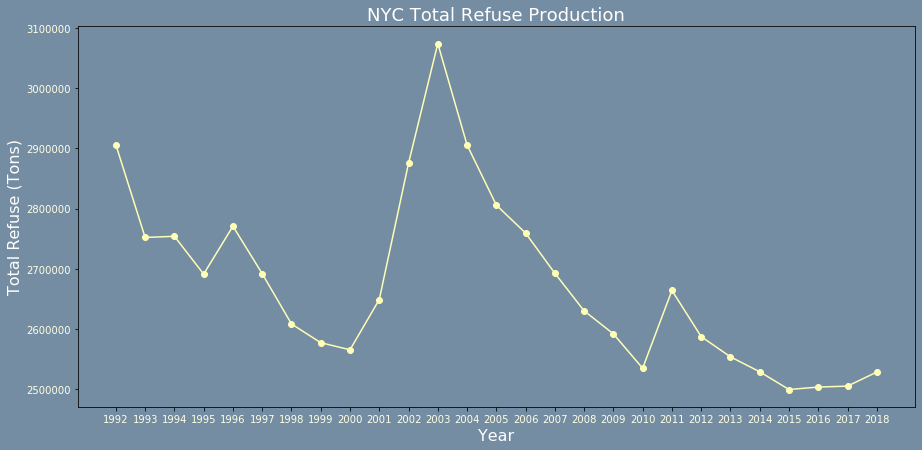

In [14]:
# Plot Refuse Total vs Time
# Plot PC_Trash vs Time
fig, ax = plt.subplots(figsize=(15,7))
year = trash_sum_df["Year"]
ax.set_xticks(year)
ax.tick_params(labelcolor="xkcd:off white")
ax.set_facecolor("xkcd:blue/grey")
fig.patch.set_facecolor("xkcd:blue/grey")

pc_trash = trash_sum_df["Refuse"]
ax.plot(year, pc_trash, marker="o", color="xkcd:light beige", linestyle="solid")

# Annotate graph
plt.title("NYC Total Refuse Production", fontsize="18",color="xkcd:white")
plt.xlabel("Year", fontsize="16",color="xkcd:white")
plt.ylabel("Total Refuse (Tons)", fontsize="16",color="xkcd:white")

# Save graph
fig.savefig(os.path.join("..","Analysis_Images","NYC Total Refuse Production.png"),facecolor=fig.get_facecolor())

In [17]:
# Merge dataframes to create per capita trash column
trash_pc = pd.merge(population_total_df, trash_sum_df, on="Year")

# Create per capita trash column
trash_pc["PC_Trash"] = trash_pc["Refuse"] / trash_pc["Population"]

PerCapitaTrash_Whole = trash_pc[["Year", "PC_Trash"]]
PerCapitaTrash_Whole.head()

,Year,PC_Trash
0,1992,0.391885
1,1993,0.367271
2,1994,0.364401
3,1995,0.353153
4,1996,0.360534


In [18]:
# Output per capita trash output data to CSV
output_0 = os.path.join("..","Clean_Data","Whole_PerCapita_Trash.csv")
PerCapitaTrash_Whole.to_csv(output_0)

# NYC Per Capita Refuse Production

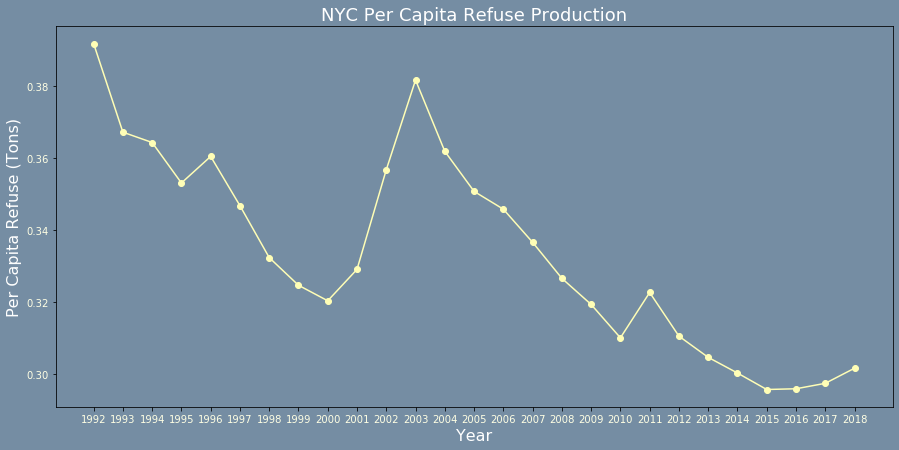

In [19]:
# Plot PC_Trash vs Time
fig, ax = plt.subplots(figsize=(15,7))
year = PerCapitaTrash_Whole["Year"]
ax.set_xticks(year)
ax.tick_params(labelcolor="xkcd:off white")
ax.set_facecolor("xkcd:blue/grey")
fig.patch.set_facecolor("xkcd:blue/grey")

pc_trash = PerCapitaTrash_Whole["PC_Trash"]
ax.plot(year, pc_trash, marker="o", color="xkcd:light beige", linestyle="solid")

# Annotate graph
plt.title("NYC Per Capita Refuse Production", fontsize="18",color='xkcd:white')
plt.xlabel("Year", fontsize="16",color="xkcd:white")
plt.ylabel("Per Capita Refuse (Tons)", fontsize="16",color="xkcd:white")
fig.savefig(os.path.join("..","Analysis_Images","NYC Per Capita Refuse Production.png"),facecolor=fig.get_facecolor())